# **Análisis Exploratorio de Datos con Python**
El presente cuaderno muestra las principales operaciones de *data wrangling* (manejo de dataframes), así como el cálculo de estadísticos descriptivos y la visualización de gráficos básicos, es decir, las operaciones que componen un análisis exploratorio de datos clásico.

### Librerías:

In [1]:
import pandas as pd #Para el manejo de dataframes
import numpy as np #Para trabajar con arrays y para realizar operaciones matemáticas y estadísticas básicas
import matplotlib.pyplot as plt #Para realizar gráficos
import statistics #Para calcular estadísticos descriptivos
import seaborn as sns #Para realizar el mapa de calor de las correlaciones y el gráfico de dispersión

### Datos:

In [2]:
np.random.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados

#Creamos un dataset con una columna de IDs, cuatro variables continuas (altura, sexo, edad e ingresos) y una categórica (sexo), y 250 observaciones:
#Altura y Peso estarán correlacionadas (a mayor altura, mayor peso), y lo mismo la edad y los ingresos:
cov_Altura_Peso = 0.7*np.sqrt((30**2)*(20**2)) #La covarianza entre X e Y es igual al producto de su correlación por sus desviaciones típicas
cov_Edad_Ingresos = 0.4*np.sqrt((15**2)*(5000**2))
cov_matriz = [[30**2, cov_Altura_Peso, 0, 0],
              [cov_Altura_Peso, 20**2, 0, 0],
              [0, 0, 15**2, cov_Edad_Ingresos],
              [0, 0, cov_Edad_Ingresos, 5000**2]]
mu = [165, 65, 30, 15000]    
datos1_Altura_Peso_Edad_Ingresos = np.random.multivariate_normal(mu, cov_matriz, size=250)
datos1 = pd.DataFrame(
    {
     "ID": range(1,251), #Los IDs serán los números entre 1 y 250 (ponemos 251, porque Python para de contar en el número anterior al que ponemos)
     "Sexo": np.random.choice(["Hombre", "Mujer"], 250), #Seleccionamos al azar, 250 veces, entre las categorías Hombre y Mujer
     "Altura": datos1_Altura_Peso_Edad_Ingresos[:, 0], #La altura sigue una normal N(165, 30)
     "Peso": datos1_Altura_Peso_Edad_Ingresos[:, 1], #El peso sigue una normal N(65, 20)
     "Edad": datos1_Altura_Peso_Edad_Ingresos[:, 2], #La edad sigue una normal N(30, 15)
     "Ingresos": datos1_Altura_Peso_Edad_Ingresos[:, 3] #Los ingresos siguen una normal N(15000, 5000)
     }
    )
print(datos1.head())
print("--------------------------------------------------")
#Creamos un segundo dataset con la misma estructura que el anterior, pero solo 50 observaciones:
datos2_Altura_Peso_Edad_Ingresos = np.random.multivariate_normal(mu, cov_matriz, size=50)
datos2 = pd.DataFrame(
    {
     "ID": range(251,301), #Los IDs serán los números entre 251 y 300
     "Sexo": np.random.choice(["Hombre", "Mujer"], 50),
     "Altura": datos2_Altura_Peso_Edad_Ingresos[:, 0],
     "Peso": datos2_Altura_Peso_Edad_Ingresos[:, 1],
     "Edad": datos2_Altura_Peso_Edad_Ingresos[:, 2],
     "Ingresos":  datos2_Altura_Peso_Edad_Ingresos[:, 3]
     }
    )
print(datos2.head())
print("--------------------------------------------------")
#Creamos un tercer dataset con una columnas de IDs y columna de Estatus laboral (Categórica), y 300 observaciones:
datos3 = pd.DataFrame(
    {
     "ID": range(1,301), #Los IDs serán los números entre 1 y 300
     "Estatus laboral": np.random.choice(["Parado", "Ocupado"], 300) #Seleccionamos al azar, 300 veces, entre las categorías Parado y Ocupado
     }
    )
print(datos3.head())

   ID    Sexo      Altura       Peso       Edad      Ingresos
0   1   Mujer  150.229582  44.822847  33.178975  22443.052167
1   2   Mujer  181.649244  83.886139  48.881989  17779.360501
2   3   Mujer  157.874035  48.709687  32.346047  15532.066664
3   4  Hombre  155.081301  75.430984   6.227304  17045.109996
4   5   Mujer  169.697078  72.106485   3.216218   7988.396738
--------------------------------------------------
    ID    Sexo      Altura        Peso       Edad      Ingresos
0  251  Hombre  224.885466   89.915206  12.311438  12419.639172
1  252   Mujer  186.193176   89.122899  35.124813  18506.418624
2  253  Hombre  190.935998   98.400070  64.990880  16851.002456
3  254   Mujer  199.325294  102.600156  43.311824  16014.442769
4  255   Mujer  141.630427   75.362372  45.771639  13314.310988
--------------------------------------------------
   ID Estatus laboral
0   1          Parado
1   2          Parado
2   3         Ocupado
3   4          Parado
4   5          Parado


### Concatenación de datasets:
Vamos a unir verticalmente (uno debajo del otro) los datasets *datos1* y *datos2*

In [ ]:
datos_1_2 = pd.concat([datos1, datos2], axis = 0) #axis = 0 porque estamos uniéndolos verticalmente (filas debajo de filas)
len(datos_1_2) #Comprobamos que la longitud del nuevo dataset es de 300
print(datos_1_2.head())

   ID    Sexo      Altura       Peso       Edad      Ingresos
0   1   Mujer  150.229582  44.822847  33.178975  22443.052167
1   2   Mujer  181.649244  83.886139  48.881989  17779.360501
2   3   Mujer  157.874035  48.709687  32.346047  15532.066664
3   4  Hombre  155.081301  75.430984   6.227304  17045.109996
4   5   Mujer  169.697078  72.106485   3.216218   7988.396738


### Unión (join) de datasets:
Vamos a unir el anterior dataset *datos_1_2* con el dataset *datos3* horizontalmente (columnas al lado de columnas), usando la columna de IDs como nexo de unión.

In [ ]:
datos_final = pd.merge(left = datos_1_2, right = datos3, left_on = "ID", right_on = "ID")
len(datos_final)
print(datos_final.head()) #Comprobamos que tenemos 300 observaciones y todas las columnas

   ID    Sexo      Altura       Peso       Edad      Ingresos Estatus laboral
0   1   Mujer  150.229582  44.822847  33.178975  22443.052167          Parado
1   2   Mujer  181.649244  83.886139  48.881989  17779.360501          Parado
2   3   Mujer  157.874035  48.709687  32.346047  15532.066664         Ocupado
3   4  Hombre  155.081301  75.430984   6.227304  17045.109996          Parado
4   5   Mujer  169.697078  72.106485   3.216218   7988.396738          Parado


### Cambiar nombre de filas y columnas del dataframe:
Como tenemos una columna de IDs identificativa de cada una de las 300 observaciones, vamos a cambiar el nombre de las filas (números del 0 al 299), por los valores de la columna *ID* (números del 1 al 300):

In [ ]:
datos_final.index = datos_final["ID"] #Renombramos el índice de las filas con los valores de la columna ID
#Eliminamos la columna ID, ya que no nos hace falta:
datos_final = datos_final.drop(["ID"], axis = 1)
#Para eliminar filas también se debe utilizar la funcion drop(): entre corchetes ponemos las filas a eliminar y especificamos axis = 0
#Cambiamos el nombre de la columna Ingresos por "Ingresos mensuales":
datos_final = datos_final.rename(columns = {"Ingresos": "Ingresos mensuales"})
print(datos_final.head())

      Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
1    Mujer  150.229582  ...        22443.052167           Parado
2    Mujer  181.649244  ...        17779.360501           Parado
3    Mujer  157.874035  ...        15532.066664          Ocupado
4   Hombre  155.081301  ...        17045.109996           Parado
5    Mujer  169.697078  ...         7988.396738           Parado

[5 rows x 6 columns]


### Función describe()
Con las función describe() podemos obtener los estadísticos descriptivos básicos de forma muy rápida.

En el caso de las variables continuas nos da el recuento, la media, la mediana, la desviación típica, el máximo, el mínimo, los cuartiles y el tipo de dato.

En el caso de las categóricas, nos da el recuento, el número de categorías, la moda y la frecuencia de la moda.

In [ ]:
for i in datos_final.columns:
  print(datos_final[i].describe())

count       300
unique        2
top       Mujer
freq        162
Name: Sexo, dtype: object
count    300.000000
mean     164.920728
std       30.007652
min       64.573903
25%      143.935965
50%      164.817472
75%      186.714163
max      249.725027
Name: Altura, dtype: float64
count    300.000000
mean      64.625151
std       20.016919
min       -0.777031
25%       50.297061
50%       65.233117
75%       78.031812
max      116.463389
Name: Peso, dtype: float64
count    300.000000
mean      30.449597
std       15.162119
min      -14.673150
25%       19.599252
50%       32.597600
75%       40.179020
max       66.599676
Name: Edad, dtype: float64
count      300.000000
mean     15174.197803
std       5103.666992
min        393.176648
25%      11801.595375
50%      14895.289035
75%      18687.541013
max      33193.651231
Name: Ingresos mensuales, dtype: float64
count         300
unique          2
top       Ocupado
freq          155
Name: Estatus laboral, dtype: object


### Medidas de centralidad por grupos:

In [ ]:
#Agrupamos los datos en función de las categorías, por ejemplo, de la variable Sexo
#Y calculamos la media y mediana por sexo de las distintas variables continuas:
datos_final.groupby(["Sexo"])[["Altura", "Peso", "Edad", "Ingresos mensuales"]].aggregate([np.mean, np.median])
#Para agrupar los datos en función de las categorías de una variable se utiliza la función groupby()
#La función aggregate() permite indicar la realización de varios cálculos a la vez
#Para calcular la moda debemos usar el paquete statistics (statistics.mode() o statistics.multimode()), pero no lo hemos hecho ya que, al ser datos aleatorios, no hay datos repetidos o éstos son mínimos

Altura              ... Ingresos mensuales              
              mean      median  ...               mean        median
Sexo                            ...                                 
Hombre  164.136778  160.594151  ...       15512.627480  15518.308651
Mujer   165.588538  166.496571  ...       14885.905855  14651.551670

[2 rows x 8 columns]

### Extracción de subconjunto de datos y medidas de dispersión de dicho subconjunto:


In [ ]:
#Utilizamos loc[] para la extracción de subconjuntos de datos:
#Vamos a extraer las filas 25 a 125 , y las columnas Altura y Peso
subconjunto = datos_final.loc[25:125,"Altura":"Peso"]
#También podríamos hacer usar de iloc[] para la extracción del mismo subconjunto de datos. En este caso, se debe explicitar el índice (número) de las columnas (en este caso la 1 y la 2):
subconjunto = datos_final.iloc[25:125,1:3] #Debemos poner hasta la 3, porque Python cuenta hasta la anterior de la 3
print(subconjunto.tail())
print("\n") #Para dejar un espacio en blanco con lo de abajo
#Calculamos ahora las principales medidas de dispersión (rango, varianza y desviación típica):
for i in subconjunto.columns:
  print("El rango de la variable " + i + " es " + str(round(subconjunto[i].max() - subconjunto[i].min(), 3))) #El resultado está redondeado a tres decimales
  print("La varianza de la variable " + i + " es " + str(round(statistics.variance(subconjunto[i]), 3)))
  print("La desviación típica de la variable " + i + " es " + str(round(statistics.stdev(subconjunto[i]), 3)))
  print("\n")
#En realidad, estamos calculando la cuasivarianza y cuasidesviación típica, ya que asumimos que los datos proceden de una muestra, no de una población entera
#Si quisiéramos hacer uso de la varianza y de la desviación típica poblacionales usamos las funciones pvariance() y pstdev() respectivamente

         Altura       Peso
ID                        
121  139.057462  65.629008
122  142.139870  46.548213
123  160.287289  59.511639
124  199.339529  65.352521
125  206.455317  95.243494


El rango de la variable Altura es 153.339
La varianza de la variable Altura es 839.168
La desviación típica de la variable Altura es 28.968


El rango de la variable Peso es 108.414
La varianza de la variable Peso es 443.081
La desviación típica de la variable Peso es 21.049




### Histograma:

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Peso en kg')]

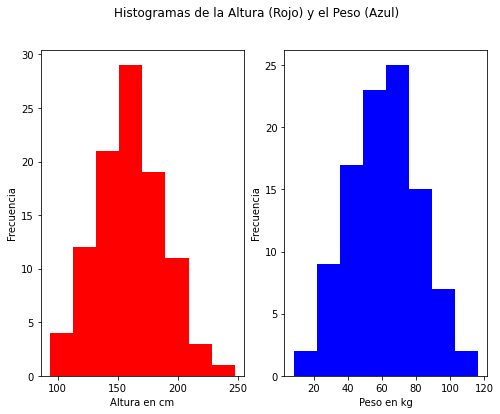

In [ ]:
#Vamos a graficar el histograma para la altura y el peso, usando el subconjunto de datos anterior:
%matplotlib inline
k = int(np.ceil(1+np.log2(len(subconjunto)))) #Regla de Sturges para determinar el número óptimo de barras del histograma: k = 1+ log_2(n). n es el número de observaciones
figure, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 6))
figure.suptitle('Histogramas de la Altura (Rojo) y el Peso (Azul)')
ax1.hist(subconjunto["Altura"], bins = k, orientation = "vertical", color = "red")
ax2.hist(subconjunto["Peso"], bins = k, orientation = "vertical", color = "blue")
ax1.set(xlabel="Altura en cm",ylabel="Frecuencia")
ax2.set(xlabel="Peso en kg",ylabel="Frecuencia")

### Correlación entre variables y diagrama de dispersión (*scatter plot*):

Text(0.5, 1.0, 'Heatmap de las correlaciones entre las variables continuas')

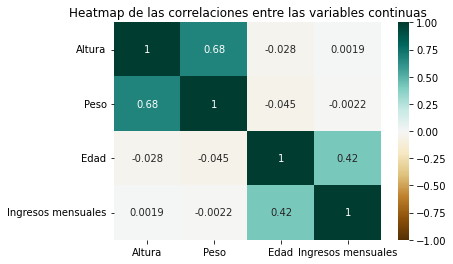

In [ ]:
#Graficamos el mapa de calor (heatmap) de las correlaciones entre las variables continuas (Altura, Peso, Edad e Ingresos mensuales):
variables_continuas = datos_final[["Altura", "Peso", "Edad", "Ingresos mensuales"]] 
heatmap = sns.heatmap(variables_continuas.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Heatmap de las correlaciones entre las variables continuas")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Peso en kg'), Text(0.5, 0, 'Altura en cm')]

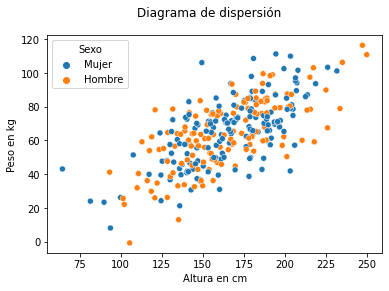

In [ ]:
#Vamos a graficar ahora el diagrama de dispersión entre las variables Altura y Peso
figure, ax = plt.subplots(1, 1)
figure.suptitle('Diagrama de dispersión')
sns.scatterplot("Altura", "Peso", data=datos_final, hue="Sexo")
ax.set(xlabel="Altura en cm",ylabel="Peso en kg")



### Filtrado de datos
Otra forma de extraer subconjuntos de datos consiste en filtrar los mismos en función de una serie de condiciones. Veamos algunos ejemplos:

In [ ]:
#Extraemos todas las observaciones con unos ingresos mensuales inferiores a 3000:
filtrado1 = datos_final[datos_final["Ingresos mensuales"] < 3000]
#Extraemos las observaciones con una altura superior a 180 cm y un peso superior a 80 kg:
filtrado2 = datos_final[(datos_final["Altura"] > 180)  & (datos_final["Peso"] > 80)]
#Extraemos las observaciones cuya altura sea inferior a 100 cm o su peso inferio a 45 kg:
filtrado3 = datos_final[(datos_final["Altura"] < 100)  | (datos_final["Peso"] < 45)]
#Extraemos las observaciones cuya altura en cm sea inferior a su peso en kg:
filtrado4 = datos_final[datos_final["Altura"] < datos_final["Peso"]]
#Vemos las primeras observaciones para cada uno de estos nuevos dataframes:
print("filtrado1", "\n", filtrado1.head(), "\n", "filtrado2", "\n", filtrado2.head(), "\n", "filtrado3", "\n",  filtrado3.head(), "\n", "filtrado4", "\n",  filtrado4.head())
#El primer dataframe está vacío ya que no hay ninguna observación con unos ingresos mensuales inferiores a 3000

filtrado1 
        Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                       ...                                     
172  Hombre  233.435250  ...         1348.741536          Ocupado
215   Mujer  164.672100  ...         2639.096270          Ocupado
234   Mujer  140.540154  ...          393.176648           Parado

[3 rows x 6 columns] 
 filtrado2 
       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
2    Mujer  181.649244  ...        17779.360501           Parado
14  Hombre  194.030858  ...        13263.440033           Parado
23  Hombre  192.325888  ...        33193.651231           Parado
28  Hombre  188.004414  ...        17404.254095           Parado
29   Mujer  206.904259  ...        11374.134124          Ocupado

[5 rows x 6 columns] 
 filtrado3 
       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
1

### Diagrama de caja y bigotes (*box-plot*):
Este tipo de gráfico resumen mucha información en poco espacio, siendo muy útil para la detección de outliers.

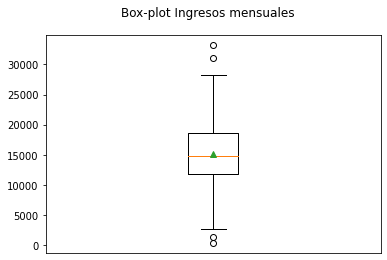

In [ ]:
#Diagrama de caja y bigotes:
%matplotlib inline
figure, ax = plt.subplots(1,1)
figure.suptitle('Box-plot Ingresos mensuales')
ax.boxplot(datos_final["Ingresos mensuales"],showmeans=True)
ax.set_xticklabels([]) #Para quitar el tick y el 1 que viene pr defecto en el eje x
ax.xaxis.set_ticks_position('none') #Para quitar el tick y el 1 que viene pr defecto en el eje x
#La media es el triángulo verde y la mediana, la línea naranja
#Los circulitos de arriba y abajo son outliers